In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("amazon_sales.csv")

In [29]:
df

,order_id,order_date,asin,sku,category,marketplace,fulfillment_channel,quantity,item_price,shipping_fee,tax_amount,total_amount,currency,customer_country,is_refunded
0,AMZ359034951,08-02-25,3DCXNK3O2G,SKU-389452,Toys,Amazon.co.uk,FBM,1,63.20,11.70,6.32,81.22,USD,US,0
1,AMZ891492717,27-02-25,91LH9GWKQU,SKU-815928,Office Supplies,Amazon.de,FBM,3,38.99,6.89,3.90,127.76,USD,FR,0
2,AMZ525054555,09-02-25,J5YPWZ8235,SKU-779729,Home & Kitchen,Amazon.com,FBM,3,15.97,14.55,1.60,64.06,USD,UK,0
3,AMZ139069032,07-02-25,WMB8HDW9N0,SKU-659897,Electronics,Amazon.co.uk,FBA,2,62.73,2.75,6.27,134.48,USD,UK,0
4,AMZ471691210,22-01-25,18ADVW2946,SKU-520101,Beauty,Amazon.de,FBM,1,135.26,4.37,13.53,153.16,USD,FR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AMZ922212366,26-01-25,20BHAI03IM,SKU-288423,Office Supplies,Amazon.de,FBA,1,17.88,0.98,1.79,20.65,USD,FR,0
496,AMZ245958691,08-01-25,TZYN5T75E4,SKU-454905,Beauty,Amazon.co.uk,FBM,1,123.31,11.98,12.33,147.62,USD,DE,0
497,AMZ557352113,23-01-25,0QHGAKFOXG,SKU-954026,Office Supplies,Amazon.com,FBA,1,125.24,1.40,12.52,139.16,USD,FR,0
498,AMZ017143021,11-01-25,SXZ0BKDD8U,SKU-786337,Office Supplies,Amazon.co.uk,FBM,2,37.27,5.35,3.73,83.62,USD,CA,0


In [30]:
df.shape

(500, 15)

In [31]:
df.columns

Index(['order_id', 'order_date', 'asin', 'sku', 'category', 'marketplace',
       'fulfillment_channel', 'quantity', 'item_price', 'shipping_fee',
       'tax_amount', 'total_amount', 'currency', 'customer_country',
       'is_refunded'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             500 non-null    object 
 1   order_date           500 non-null    object 
 2   asin                 500 non-null    object 
 3   sku                  500 non-null    object 
 4   category             500 non-null    object 
 5   marketplace          500 non-null    object 
 6   fulfillment_channel  500 non-null    object 
 7   quantity             500 non-null    int64  
 8   item_price           500 non-null    float64
 9   shipping_fee         500 non-null    float64
 10  tax_amount           500 non-null    float64
 11  total_amount         500 non-null    float64
 12  currency             500 non-null    object 
 13  customer_country     500 non-null    object 
 14  is_refunded          500 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memor

In [33]:
df.isna().sum().sort_values(ascending=False)

order_id               0
order_date             0
asin                   0
sku                    0
category               0
marketplace            0
fulfillment_channel    0
quantity               0
item_price             0
shipping_fee           0
tax_amount             0
total_amount           0
currency               0
customer_country       0
is_refunded            0
dtype: int64

In [34]:
df.duplicated().sum()
df["order_id"].duplicated().sum()

np.int64(0)

In [35]:
cols_check = ["category","marketplace","fulfillment_channel","currency","customer_country","is_refunded"]
{c: df[c].unique() for c in cols_check}

{'category': array(['Toys', 'Office Supplies', 'Home & Kitchen', 'Electronics',
        'Beauty', 'Sports'], dtype=object),
 'marketplace': array(['Amazon.co.uk', 'Amazon.de', 'Amazon.com'], dtype=object),
 'fulfillment_channel': array(['FBM', 'FBA'], dtype=object),
 'currency': array(['USD'], dtype=object),
 'customer_country': array(['US', 'FR', 'UK', 'DE', 'CA'], dtype=object),
 'is_refunded': array([0, 1])}

In [36]:
num_cols = ["quantity","item_price","shipping_fee","tax_amount","total_amount"]
df[num_cols].describe()

(df[num_cols] < 0).sum()
(df["quantity"] == 0).sum()

np.int64(0)

### Data Standardization & Logical Validation

In [37]:
df["order_date"] = pd.to_datetime(df["order_date"])

C:\Users\MegaNotik\AppData\Local\Temp\ipykernel_11832\4261617660.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_date"] = pd.to_datetime(df["order_date"])


In [38]:
df["order_date"].min(), df["order_date"].max()

(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-12-02 00:00:00'))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             500 non-null    object        
 1   order_date           500 non-null    datetime64[ns]
 2   asin                 500 non-null    object        
 3   sku                  500 non-null    object        
 4   category             500 non-null    object        
 5   marketplace          500 non-null    object        
 6   fulfillment_channel  500 non-null    object        
 7   quantity             500 non-null    int64         
 8   item_price           500 non-null    float64       
 9   shipping_fee         500 non-null    float64       
 10  tax_amount           500 non-null    float64       
 11  total_amount         500 non-null    float64       
 12  currency             500 non-null    object        
 13  customer_country     500 non-null  

In [40]:
df["calculated_total"] = (
    df["quantity"] * df["item_price"] +
    df["shipping_fee"] +
    df["tax_amount"]
).round(2)

(df["total_amount"] - df["calculated_total"]).abs().sum()

np.float64(0.0)

In [41]:
# Negative or zero values
print("Zero quantity:", (df["quantity"] == 0).sum())
print("Negative prices:", (df["item_price"] < 0).sum())
print("Negative shipping:", (df["shipping_fee"] < 0).sum())
print("Negative tax:", (df["tax_amount"] < 0).sum())
print("Negative total:", (df["total_amount"] < 0).sum())

Zero quantity: 0
Negative prices: 0
Negative shipping: 0
Negative tax: 0
Negative total: 0


In [42]:
df["is_refunded"].value_counts(normalize=True)

is_refunded
0    0.954
1    0.046
Name: proportion, dtype: float64

In [43]:
df.drop(columns=["calculated_total"], inplace=True)

### Core Revenue KPIs

In [44]:
total_revenue = float(df["total_amount"].sum())
total_orders = int(df["order_id"].nunique())
total_units = int(df["quantity"].sum())
aov = float(df["total_amount"].mean())
refund_rate = float(df["is_refunded"].mean())

kpi_summary = {
    "total_revenue": round(total_revenue, 2),
    "total_orders": total_orders,
    "total_units": total_units,
    "average_order_value": round(aov, 2),
    "refund_rate": round(refund_rate, 4)
}
kpi_summary

{'total_revenue': 161576.08,
 'total_orders': 500,
 'total_units': 966,
 'average_order_value': 323.15,
 'refund_rate': 0.046}

In [45]:
revenue_by_marketplace = {
    k: float(v)
    for k, v in (
        df.groupby("marketplace")["total_amount"]
        .sum().round(2).sort_values(ascending=False)
        .items()
    )
}
revenue_by_marketplace

{'Amazon.com': 56297.0, 'Amazon.co.uk': 54181.04, 'Amazon.de': 51098.04}

In [46]:
revenue_by_fulfillment = {
    k: float(v)
    for k, v in (
        df.groupby("fulfillment_channel")["total_amount"]
        .sum().round(2).sort_values(ascending=False)
        .items()
    )
}
revenue_by_fulfillment

{'FBM': 82336.24, 'FBA': 79239.84}

In [47]:
revenue_by_category = {
    k: float(v)
    for k, v in (
        df.groupby("category")["total_amount"]
        .sum().round(2).sort_values(ascending=False)
        .items()
    )
}
revenue_by_category

{'Toys': 31350.3,
 'Office Supplies': 30715.2,
 'Electronics': 25900.58,
 'Sports': 25796.38,
 'Home & Kitchen': 25038.24,
 'Beauty': 22775.38}

### Revenue Trend (Daily)

In [48]:
import matplotlib.pyplot as plt

daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)
daily_revenue.head()

order_date
2025-01-01    3412.38
2025-01-02    2684.09
2025-01-03    2380.22
2025-01-13    1442.44
2025-01-14    3512.39
Name: total_amount, dtype: float64

In [49]:
daily_revenue.index.dtype

dtype('<M8[ns]')

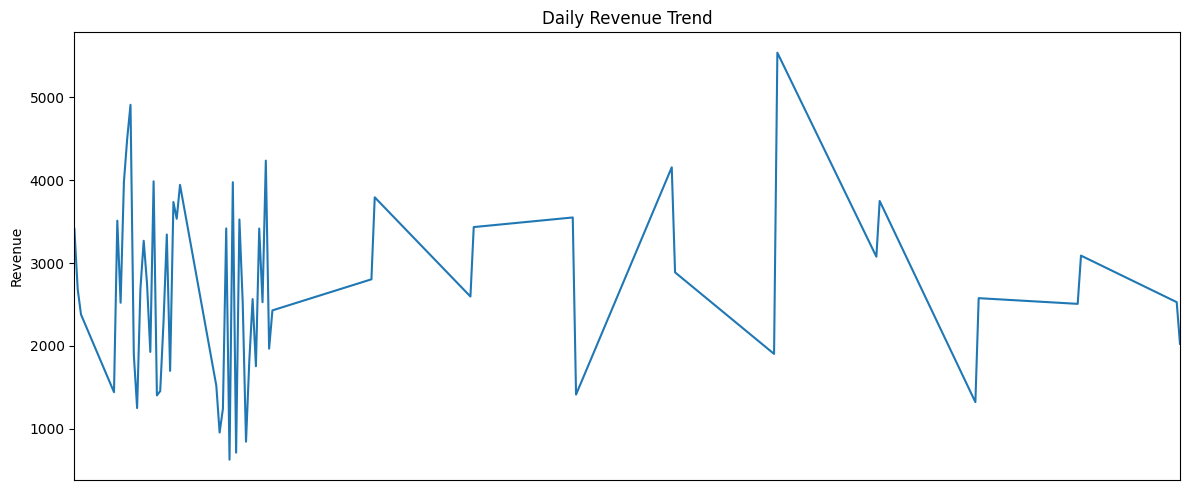

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(daily_revenue.index, daily_revenue.values)

ax.set_xlim(daily_revenue.index.min(), daily_revenue.index.max())

ax.set_xlabel("")

ax.set_xticks([])

ax.set_title("Daily Revenue Trend")
ax.set_ylabel("Revenue")

plt.tight_layout()
plt.show()

In [54]:
import numpy as np

# --- Revenue ---
total_revenue = float(df["total_amount"].sum())

# --- Refunded revenue ---
refunded_revenue = float(
    df.loc[df["is_refunded"] == 1, "total_amount"].sum()
)

# --- Trend slope ---
daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

x = np.arange(len(daily_revenue))
y = daily_revenue.values
trend_slope = float(np.polyfit(x, y, 1)[0])

# --- Category concentration ---
category_revenue_series = (
    df.groupby("category")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

top3_category_share = float(
    category_revenue_series.head(3).sum() / total_revenue
)

# --- AOV by marketplace ---
aov_by_marketplace = {
    k: float(v)
    for k, v in (
        df.groupby("marketplace")["total_amount"]
        .mean()
        .round(2)
        .items()
    )
}

# --- AOV by fulfillment ---
aov_by_fulfillment = {
    k: float(v)
    for k, v in (
        df.groupby("fulfillment_channel")["total_amount"]
        .mean()
        .round(2)
        .items()
    )
}

# --- Refund revenue share ---
refund_revenue_share = float(refunded_revenue / total_revenue)

advanced_metrics = {
    "trend_slope": trend_slope,
    "top3_category_share": round(top3_category_share, 4),
    "aov_by_marketplace": aov_by_marketplace,
    "aov_by_fulfillment": aov_by_fulfillment,
    "refund_revenue_share": round(refund_revenue_share, 4)
}

advanced_metrics

{'trend_slope': 0.6804284523478589,
 'top3_category_share': 0.5444,
 'aov_by_marketplace': {'Amazon.co.uk': 311.39,
  'Amazon.com': 354.07,
  'Amazon.de': 305.98},
 'aov_by_fulfillment': {'FBA': 314.44, 'FBM': 332.0},
 'refund_revenue_share': 0.0357}

In [55]:
marketplace_revenue = (
    df.groupby("marketplace")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

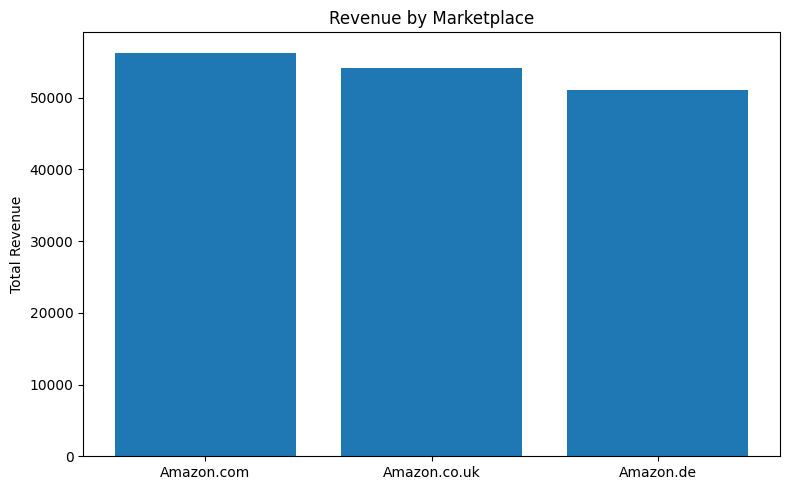

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(marketplace_revenue.index, marketplace_revenue.values)

ax.set_title("Revenue by Marketplace")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [57]:
fulfillment_revenue = (
    df.groupby("fulfillment_channel")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

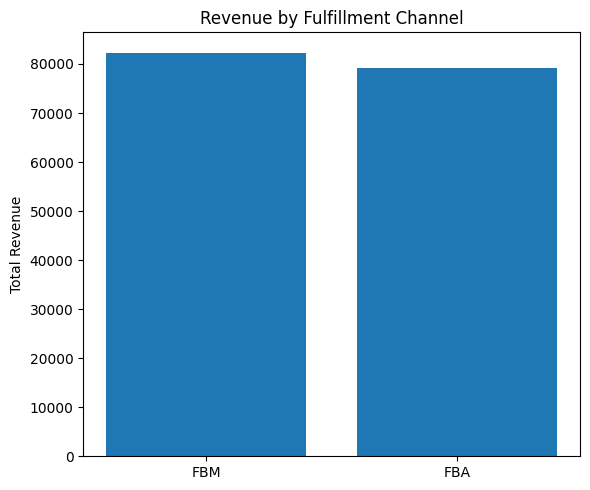

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))

ax.bar(fulfillment_revenue.index, fulfillment_revenue.values)

ax.set_title("Revenue by Fulfillment Channel")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

In [59]:
total_refunded_orders = int(df["is_refunded"].sum())

refunded_revenue = float(
    df.loc[df["is_refunded"] == 1, "total_amount"].sum()
)

refund_summary = {
    "total_refunded_orders": total_refunded_orders,
    "refund_rate": round(float(df["is_refunded"].mean()), 4),
    "refunded_revenue": round(refunded_revenue, 2)
}

refund_summary

{'total_refunded_orders': 23,
 'refund_rate': 0.046,
 'refunded_revenue': 5769.95}

In [60]:
refund_by_fulfillment = (
    df.groupby("fulfillment_channel")["is_refunded"]
    .mean()
    .round(4)
    .to_dict()
)

refund_by_fulfillment

{'FBA': 0.0437, 'FBM': 0.0484}

In [61]:
refund_by_category = (
    df.groupby("category")["is_refunded"]
    .mean()
    .round(4)
    .sort_values(ascending=False)
    .to_dict()
)

refund_by_category

{'Beauty': 0.0779,
 'Electronics': 0.0658,
 'Home & Kitchen': 0.0595,
 'Office Supplies': 0.0532,
 'Toys': 0.0222,
 'Sports': 0.0}

In [62]:
import json


data_metadata = {
    "rows": int(df.shape[0]),
    "columns": int(df.shape[1]),
    "date_min": df["order_date"].min().strftime("%Y-%m-%d"),
    "date_max": df["order_date"].max().strftime("%Y-%m-%d"),
    "marketplaces": sorted(df["marketplace"].unique().tolist()),
    "categories": sorted(df["category"].unique().tolist()),
    "fulfillment_channels": sorted(df["fulfillment_channel"].unique().tolist()),
    "currency": sorted(df["currency"].unique().tolist())
}


top_products_by_revenue = (
    df.groupby(["asin", "sku"])["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .round(2)
    .reset_index()
    .to_dict(orient="records")
)


daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)


trend_summary = {
    "daily_revenue_start": float(daily_revenue.iloc[0].round(2)),
    "daily_revenue_end": float(daily_revenue.iloc[-1].round(2)),
    "daily_revenue_avg": float(daily_revenue.mean().round(2)),
    "peak_day": daily_revenue.idxmax().strftime("%Y-%m-%d"),
    "peak_day_revenue": float(daily_revenue.max().round(2)),
    "low_day": daily_revenue.idxmin().strftime("%Y-%m-%d"),
    "low_day_revenue": float(daily_revenue.min().round(2)),
}


report_data = {
    "report_title": "Amazon eCommerce Performance Report: Revenue, Risk & Fulfillment Efficiency",
    "business_questions": [
        "How is revenue trending over time and are there volatility peaks?",
        "Which marketplaces and categories drive the most revenue?",
        "Is fulfillment strategy balanced between FBA and FBM, and which performs better?",
        "What is the refund rate, what is the revenue exposure, and where is risk concentrated?"
    ],
    "data_metadata": data_metadata,

    "kpis": kpi_summary,

    "segmentation": {
        "revenue_by_marketplace": revenue_by_marketplace,
        "revenue_by_fulfillment": revenue_by_fulfillment,
        "revenue_by_category": revenue_by_category,
        "top_products_by_revenue": top_products_by_revenue
    },

    "risk": {
        "refund_summary": refund_summary,
        "refund_rate_by_fulfillment": refund_by_fulfillment,
        "refund_rate_by_category": refund_by_category
    },

    "trend_summary": trend_summary
}

json.dumps(report_data)[:300]

'{"report_title": "Amazon eCommerce Performance Report: Revenue, Risk & Fulfillment Efficiency", "business_questions": ["How is revenue trending over time and are there volatility peaks?", "Which marketplaces and categories drive the most revenue?", "Is fulfillment strategy balanced between FBA and F'

In [63]:
import os
import json

# папка для графіків
CHART_DIR = "charts"
os.makedirs(CHART_DIR, exist_ok=True)

# тут report_data вже має бути зібраний (як ми робили раніше)
# + додамо секцію під артефакти (графіки)
report_data.setdefault("artifacts", {})
report_data["artifacts"]["charts"] = {
    "daily_revenue_trend": f"{CHART_DIR}/daily_revenue_trend.png",
    "revenue_by_marketplace": f"{CHART_DIR}/revenue_by_marketplace.png",
    "revenue_by_fulfillment": f"{CHART_DIR}/revenue_by_fulfillment.png",
}

with open("retail_ai_report_data.json", "w", encoding="utf-8") as f:
    json.dump(report_data, f, indent=4, ensure_ascii=False)

In [64]:
import matplotlib.pyplot as plt

# 1) Daily revenue trend
daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(daily_revenue.index, daily_revenue.values)
ax.set_xlim(daily_revenue.index.min(), daily_revenue.index.max())
ax.set_title("Daily Revenue Trend")
ax.set_ylabel("Revenue")
ax.set_xlabel("")
ax.set_xticks([])  # як ти просив — без підписів по X
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["daily_revenue_trend"], dpi=200)
plt.close()


# 2) Revenue by marketplace
marketplace_revenue = (
    df.groupby("marketplace")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(marketplace_revenue.index, marketplace_revenue.values)
ax.set_title("Revenue by Marketplace")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["revenue_by_marketplace"], dpi=200)
plt.close()


# 3) Revenue by fulfillment (FBA vs FBM)
fulfillment_revenue = (
    df.groupby("fulfillment_channel")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(fulfillment_revenue.index, fulfillment_revenue.values)
ax.set_title("Revenue by Fulfillment Channel")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["revenue_by_fulfillment"], dpi=200)
plt.close()

In [65]:
import os
import numpy as np

# 1) Коректний діапазон дат (джерело істини)
date_min = df["order_date"].min().strftime("%Y-%m-%d")
date_max = df["order_date"].max().strftime("%Y-%m-%d")

# 2) Advanced metrics (детерміновано, без LLM)
x = np.arange(len(daily_revenue))
y = daily_revenue.values
trend_slope = float(np.polyfit(x, y, 1)[0])

total_revenue = float(df["total_amount"].sum())
refunded_revenue = float(df.loc[df["is_refunded"] == 1, "total_amount"].sum())

category_revenue_series = (
    df.groupby("category")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

advanced_metrics = {
    "trend_slope": trend_slope,
    "top3_category_share": round(float(category_revenue_series.head(3).sum() / total_revenue), 4),
    "aov_by_marketplace": {k: float(v) for k, v in df.groupby("marketplace")["total_amount"].mean().round(2).items()},
    "aov_by_fulfillment": {k: float(v) for k, v in df.groupby("fulfillment_channel")["total_amount"].mean().round(2).items()},
    "refund_revenue_share": round(float(refunded_revenue / total_revenue), 4),
}

# 3) Вставити в report_data (джерело істини для LLM)
report_data["data_metadata"]["date_min"] = date_min
report_data["data_metadata"]["date_max"] = date_max
report_data["advanced_metrics"] = advanced_metrics

# 4) Перевірка наявності графіків (щоб точно відображались у Markdown/HTML)
charts = report_data.get("artifacts", {}).get("charts", {})
charts_check = {name: os.path.exists(path) for name, path in charts.items()}

date_min, date_max, advanced_metrics, charts_check

('2025-01-01',
 '2025-12-02',
 {'trend_slope': 0.6804284523478589,
  'top3_category_share': 0.5444,
  'aov_by_marketplace': {'Amazon.co.uk': 311.39,
   'Amazon.com': 354.07,
   'Amazon.de': 305.98},
  'aov_by_fulfillment': {'FBA': 314.44, 'FBM': 332.0},
  'refund_revenue_share': 0.0357},
 {'daily_revenue_trend': True,
  'revenue_by_marketplace': True,
  'revenue_by_fulfillment': True})

In [66]:
import os
import matplotlib.pyplot as plt

# 1) Де зберігаємо графіки
CHART_DIR = "charts"
os.makedirs(CHART_DIR, exist_ok=True)

# 2) Додати в report_data посилання на графіки
report_data.setdefault("artifacts", {})
report_data["artifacts"]["charts"] = {
    "daily_revenue_trend": f"{CHART_DIR}/daily_revenue_trend.png",
    "revenue_by_marketplace": f"{CHART_DIR}/revenue_by_marketplace.png",
    "revenue_by_fulfillment": f"{CHART_DIR}/revenue_by_fulfillment.png",
}

# 3) Побудова та збереження графіків (як PNG)
# Daily revenue trend
daily_revenue = (
    df.groupby("order_date")["total_amount"]
    .sum()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(daily_revenue.index, daily_revenue.values)
ax.set_xlim(daily_revenue.index.min(), daily_revenue.index.max())
ax.set_title("Daily Revenue Trend")
ax.set_ylabel("Revenue")
ax.set_xlabel("")
ax.set_xticks([])  # без підписів по осі X
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["daily_revenue_trend"], dpi=200)
plt.close()

# Revenue by marketplace
marketplace_revenue = (
    df.groupby("marketplace")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(marketplace_revenue.index, marketplace_revenue.values)
ax.set_title("Revenue by Marketplace")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["revenue_by_marketplace"], dpi=200)
plt.close()

# Revenue by fulfillment
fulfillment_revenue = (
    df.groupby("fulfillment_channel")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(fulfillment_revenue.index, fulfillment_revenue.values)
ax.set_title("Revenue by Fulfillment Channel")
ax.set_ylabel("Total Revenue")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig(report_data["artifacts"]["charts"]["revenue_by_fulfillment"], dpi=200)
plt.close()

# 4) Перевірка, що файли реально існують
charts_check = {k: os.path.exists(v) for k, v in report_data["artifacts"]["charts"].items()}
charts_check

{'daily_revenue_trend': True,
 'revenue_by_marketplace': True,
 'revenue_by_fulfillment': True}

In [67]:
json_schema = {
  "name": "executive_report",
  "schema": {
    "type": "object",
    "additionalProperties": False,
    "properties": {
      "executive_summary": {"type": "array", "items": {"type": "string"}, "minItems": 5, "maxItems": 8},
      "revenue_structure": {
        "type": "object",
        "additionalProperties": False,
        "properties": {
          "trend_statement": {"type": "string"},
          "volatility_statement": {"type": "string"},
          "key_category_takeaway": {"type": "string"},
          "sku_concentration_takeaway": {"type": "string"},
          "order_structure_takeaway": {"type": "string"}
        },
        "required": ["trend_statement","volatility_statement","key_category_takeaway","sku_concentration_takeaway","order_structure_takeaway"]
      },
      "marketplace_performance": {
        "type": "object",
        "additionalProperties": False,
        "properties": {
          "leader_marketplace_takeaway": {"type": "string"},
          "aov_comparison_takeaway": {"type": "string"},
          "dependency_risk_takeaway": {"type": "string"}
        },
        "required": ["leader_marketplace_takeaway","aov_comparison_takeaway","dependency_risk_takeaway"]
      },
      "fulfillment_efficiency": {
        "type": "object",
        "additionalProperties": False,
        "properties": {
          "revenue_split_takeaway": {"type": "string"},
          "aov_takeaway": {"type": "string"},
          "refund_rate_takeaway": {"type": "string"},
          "scale_fba_recommendation": {"type": "string"}
        },
        "required": ["revenue_split_takeaway","aov_takeaway","refund_rate_takeaway","scale_fba_recommendation"]
      },
      "risk_refunds": {
        "type": "object",
        "additionalProperties": False,
        "properties": {
          "overall_risk_takeaway": {"type": "string"},
          "concentration_takeaway": {"type": "string"},
          "data_limits": {"type": "array", "items": {"type": "string"}, "minItems": 1, "maxItems": 5}
        },
        "required": ["overall_risk_takeaway","concentration_takeaway","data_limits"]
      },
      "recommendations": {
        "type": "array",
        "minItems": 3,
        "maxItems": 5,
        "items": {
          "type": "object",
          "additionalProperties": False,
          "properties": {
            "priority": {"type": "integer", "minimum": 1, "maximum": 5},
            "action": {"type": "string"},
            "rationale": {"type": "string"},
            "metric_link": {"type": "string"}
          },
          "required": ["priority","action","rationale","metric_link"]
        }
      }
    },
    "required": ["executive_summary","revenue_structure","marketplace_performance","fulfillment_efficiency","risk_refunds","recommendations"]
  }
}

In [68]:
pip install openai --upgrade

Note: you may need to restart the kernel to use updated packages.


In [72]:
PROMPT_JSON_ONLY = """
Return ONLY valid JSON (no markdown, no code fences, no explanations).
The JSON must match this exact top-level structure and keys:

{
  "executive_summary": [string, ...],
  "revenue_structure": {
    "trend_statement": string,
    "volatility_statement": string,
    "key_category_takeaway": string,
    "sku_concentration_takeaway": string,
    "order_structure_takeaway": string
  },
  "marketplace_performance": {
    "leader_marketplace_takeaway": string,
    "aov_comparison_takeaway": string,
    "dependency_risk_takeaway": string
  },
  "fulfillment_efficiency": {
    "revenue_split_takeaway": string,
    "aov_takeaway": string,
    "refund_rate_takeaway": string,
    "scale_fba_recommendation": string
  },
  "risk_refunds": {
    "overall_risk_takeaway": string,
    "concentration_takeaway": string,
    "data_limits": [string, ...]
  },
  "recommendations": [
    {"priority": int, "action": string, "rationale": string, "metric_link": string},
    ...
  ]
}

Rules:
- Use ONLY INPUT DATA. Do not invent dates or values.
- Use data_metadata.date_min/date_max for date range.
- Use advanced_metrics.trend_slope for trend direction (do not use first/last day comparison).
- If something is not determinable, write: "Not determinable from provided data."
"""

In [70]:
pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.


In [73]:
import json
import re
from openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

report_json_str = json.dumps(report_data, indent=2, ensure_ascii=False)

response = client.responses.create(
    model="gpt-5.2",
    input=f"{PROMPT_JSON_ONLY}\n\nINPUT DATA:\n{report_json_str}"
)

raw = response.output_text.strip()

def extract_json(text: str) -> str:
    # якщо модель все ж додала текст — дістаємо перший JSON-об'єкт
    match = re.search(r"\{.*\}", text, flags=re.DOTALL)
    if not match:
        raise ValueError("No JSON object found in model output.")
    return match.group(0)

json_text = extract_json(raw)
report_structured = json.loads(json_text)

# швидка валідація ключів
required_keys = [
    "executive_summary","revenue_structure","marketplace_performance",
    "fulfillment_efficiency","risk_refunds","recommendations"
]
missing = [k for k in required_keys if k not in report_structured]
missing, report_structured["executive_summary"][:2]

([],
 ['From 2025-01-01 to 2025-12-02, total revenue was 161576.08 USD across 500 orders (AOV 323.15) and 966 units.',
  'Revenue shows an upward trend per advanced_metrics.trend_slope (0.6804284523478589), with notable volatility between the peak day (2025-08-02: 5540.23) and low day (2025-02-17: 628.06).'])

In [74]:
from datetime import datetime

def md_kpi_table(kpis: dict) -> str:
    rows = [
        ("Total Revenue", f"${kpis['total_revenue']:,.2f}"),
        ("Total Orders", f"{kpis['total_orders']:,}"),
        ("Total Units", f"{kpis['total_units']:,}"),
        ("Average Order Value (AOV)", f"${kpis['average_order_value']:,.2f}"),
        ("Refund Rate", f"{kpis['refund_rate']*100:.2f}%"),
    ]
    md = "| KPI | Value |\n|---|---:|\n"
    md += "\n".join([f"| {k} | {v} |" for k, v in rows])
    return md

def md_dict_bullets(title: str, d: dict, money: bool = True) -> str:
    lines = [f"### {title}"]
    for k, v in d.items():
        if isinstance(v, (int, float)) and money:
            lines.append(f"- **{k}**: ${v:,.2f}")
        else:
            lines.append(f"- **{k}**: {v}")
    return "\n".join(lines)

charts = report_data["artifacts"]["charts"]

md = []
md.append("# Amazon eCommerce Performance Report: Revenue, Risk & Fulfillment Efficiency\n")
md.append(f"_Date range: **{report_data['data_metadata']['date_min']}** to **{report_data['data_metadata']['date_max']}** | Generated: {datetime.now().strftime('%Y-%m-%d')}_\n")

# Executive summary
md.append("## Executive Summary")
for b in report_structured["executive_summary"]:
    md.append(f"- {b}")
md.append("")

# KPI snapshot
md.append("## KPI Snapshot")
md.append(md_kpi_table(report_data["kpis"]))
md.append("")

# Revenue & structure
md.append("## Revenue & Structure")
md.append(f"![]({charts['daily_revenue_trend']})\n")
rs = report_structured["revenue_structure"]
md.append(f"- **Trend:** {rs['trend_statement']}")
md.append(f"- **Volatility:** {rs['volatility_statement']}")
md.append(f"- **Categories:** {rs['key_category_takeaway']}")
md.append(f"- **SKU/ASIN concentration:** {rs['sku_concentration_takeaway']}")
md.append(f"- **Order structure:** {rs['order_structure_takeaway']}\n")

# Add deterministic segmentation bullets
md.append(md_dict_bullets("Revenue by Marketplace", report_data["segmentation"]["revenue_by_marketplace"], money=True))
md.append("")
md.append(md_dict_bullets("Revenue by Fulfillment Channel", report_data["segmentation"]["revenue_by_fulfillment"], money=True))
md.append("")
md.append(md_dict_bullets("Revenue by Category", report_data["segmentation"]["revenue_by_category"], money=True))
md.append("")

# Marketplace performance
md.append("## Marketplace Performance")
md.append(f"![]({charts['revenue_by_marketplace']})\n")
mp = report_structured["marketplace_performance"]
md.append(f"- {mp['leader_marketplace_takeaway']}")
md.append(f"- {mp['aov_comparison_takeaway']}")
md.append(f"- {mp['dependency_risk_takeaway']}\n")

# Fulfillment
md.append("## Fulfillment Efficiency (FBA vs FBM)")
md.append(f"![]({charts['revenue_by_fulfillment']})\n")
fe = report_structured["fulfillment_efficiency"]
md.append(f"- {fe['revenue_split_takeaway']}")
md.append(f"- {fe['aov_takeaway']}")
md.append(f"- {fe['refund_rate_takeaway']}")
md.append(f"- {fe['scale_fba_recommendation']}\n")

# Risk & refunds
md.append("## Risk & Refund Exposure")
rr = report_structured["risk_refunds"]
md.append(f"- {rr['overall_risk_takeaway']}")
md.append(f"- {rr['concentration_takeaway']}")
md.append("### Data limits")
for item in rr["data_limits"]:
    md.append(f"- {item}")
md.append("")

# Recommendations
md.append("## Strategic Recommendations (Prioritized)")
recs = sorted(report_structured["recommendations"], key=lambda x: x["priority"])
for r in recs:
    md.append(f"**{r['priority']}. {r['action']}**  ")
    md.append(f"- Rationale: {r['rationale']}")
    md.append(f"- Metric link: {r['metric_link']}\n")

# Appendix
md.append("## Appendix – Data Context")
meta = report_data["data_metadata"]
md.append(f"- Rows: **{meta['rows']}**")
md.append(f"- Currency: **{', '.join(meta['currency'])}**")
md.append(f"- Marketplaces: **{', '.join(meta['marketplaces'])}**")
md.append(f"- Fulfillment channels: **{', '.join(meta['fulfillment_channels'])}**")
md.append(f"- Categories: **{', '.join(meta['categories'])}**")
md.append("")

business_report_md = "\n".join(md)

with open("business_report.md", "w", encoding="utf-8") as f:
    f.write(business_report_md)

"business_report.md saved"

'business_report.md saved'

In [77]:
pip install reportlab --upgrade

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/2.0 MB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/2.0 MB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [78]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.lib.units import cm
import os

pdf_path = "business_report.pdf"

styles = getSampleStyleSheet()
title_style = styles["Title"]
h2 = styles["Heading2"]
body = styles["BodyText"]

doc = SimpleDocTemplate(pdf_path, pagesize=A4,
                        leftMargin=2*cm, rightMargin=2*cm,
                        topMargin=2*cm, bottomMargin=2*cm)

story = []

# Title
story.append(Paragraph(report_data["report_title"], title_style))
story.append(Spacer(1, 10))

# Meta
meta = report_data["data_metadata"]
story.append(Paragraph(f"Date range: {meta['date_min']} to {meta['date_max']}", body))
story.append(Spacer(1, 10))

# Executive Summary
story.append(Paragraph("Executive Summary", h2))
for b in report_structured["executive_summary"]:
    story.append(Paragraph(f"• {b}", body))
story.append(Spacer(1, 12))

# KPI Table
story.append(Paragraph("KPI Snapshot", h2))
kpis = report_data["kpis"]
table_data = [
    ["KPI", "Value"],
    ["Total Revenue", f"${kpis['total_revenue']:,.2f}"],
    ["Total Orders", f"{kpis['total_orders']:,}"],
    ["Total Units", f"{kpis['total_units']:,}"],
    ["Average Order Value (AOV)", f"${kpis['average_order_value']:,.2f}"],
    ["Refund Rate", f"{kpis['refund_rate']*100:.2f}%"],
]
t = Table(table_data, colWidths=[8*cm, 6*cm])
t.setStyle(TableStyle([
    ("BACKGROUND", (0,0), (-1,0), colors.lightgrey),
    ("GRID", (0,0), (-1,-1), 0.5, colors.grey),
    ("FONTNAME", (0,0), (-1,0), "Helvetica-Bold"),
    ("VALIGN", (0,0), (-1,-1), "TOP"),
]))
story.append(t)
story.append(Spacer(1, 12))

charts = report_data["artifacts"]["charts"]

def add_chart(title, path, width_cm=16):
    story.append(Paragraph(title, h2))
    if os.path.exists(path):
        img = Image(path, width=width_cm*cm, height=7*cm)
        story.append(img)
    else:
        story.append(Paragraph(f"[Missing chart file: {path}]", body))
    story.append(Spacer(1, 12))

# Charts + sections
add_chart("Revenue & Structure — Daily Revenue Trend", charts["daily_revenue_trend"])
rs = report_structured["revenue_structure"]
for line in [
    f"Trend: {rs['trend_statement']}",
    f"Volatility: {rs['volatility_statement']}",
    f"Categories: {rs['key_category_takeaway']}",
    f"SKU/ASIN concentration: {rs['sku_concentration_takeaway']}",
    f"Order structure: {rs['order_structure_takeaway']}",
]:
    story.append(Paragraph(f"• {line}", body))
story.append(Spacer(1, 12))

add_chart("Marketplace Performance — Revenue by Marketplace", charts["revenue_by_marketplace"], width_cm=14)
mp = report_structured["marketplace_performance"]
for line in [mp["leader_marketplace_takeaway"], mp["aov_comparison_takeaway"], mp["dependency_risk_takeaway"]]:
    story.append(Paragraph(f"• {line}", body))
story.append(Spacer(1, 12))

add_chart("Fulfillment Efficiency — Revenue by Fulfillment", charts["revenue_by_fulfillment"], width_cm=12)
fe = report_structured["fulfillment_efficiency"]
for line in [fe["revenue_split_takeaway"], fe["aov_takeaway"], fe["refund_rate_takeaway"], fe["scale_fba_recommendation"]]:
    story.append(Paragraph(f"• {line}", body))
story.append(Spacer(1, 12))

# Risk & refunds
story.append(Paragraph("Risk & Refund Exposure", h2))
rr = report_structured["risk_refunds"]
story.append(Paragraph(f"• {rr['overall_risk_takeaway']}", body))
story.append(Paragraph(f"• {rr['concentration_takeaway']}", body))
story.append(Spacer(1, 6))
story.append(Paragraph("Data limits:", body))
for item in rr["data_limits"]:
    story.append(Paragraph(f"• {item}", body))
story.append(Spacer(1, 12))

# Recommendations
story.append(Paragraph("Strategic Recommendations (Prioritized)", h2))
recs = sorted(report_structured["recommendations"], key=lambda x: x["priority"])
for r in recs:
    story.append(Paragraph(f"{r['priority']}. {r['action']}", styles["Heading3"]))
    story.append(Paragraph(f"Rationale: {r['rationale']}", body))
    story.append(Paragraph(f"Metric link: {r['metric_link']}", body))
    story.append(Spacer(1, 8))

doc.build(story)

pdf_path

'business_report.pdf'